In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import math
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
import seaborn as sns
import matplotlib
from sklearn.preprocessing import Binarizer
import sklearn
import math
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import time
import warnings

In [2]:
df1=pd.read_csv(r"C:\Users\SaurabhM\Desktop\data2\train.csv")
df2=pd.read_csv(r"C:\Users\SaurabhM\Desktop\data2\test.csv")

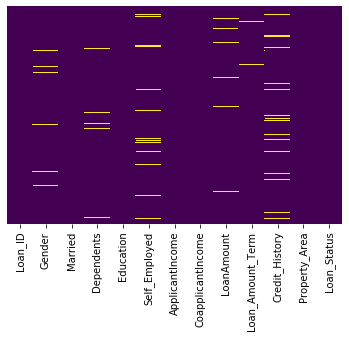

In [4]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

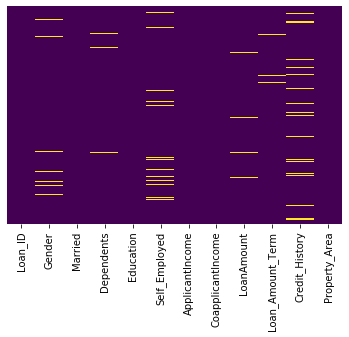

In [5]:
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
missing_value=df1.isnull().sum()

In [7]:
missing_value

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
missing_value_2=df2.isnull().sum()
missing_value_2

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [9]:

#Using lambda funstion for dependents
def impute_dep(cols):
    Dependents = cols[0]
    Married = cols[1]
    
    if pd.isnull(Dependents):

        if Married == "Yes":
            return 2

        elif Married == "No":
            return 0

        else:
            return 0

    else:
        if Dependents=="0":
            return 0
        elif Dependents=="1":
            return 1
        elif Dependents=="2":
            return 2
        elif Dependents=="3+":
            return 3
        else:
            return Dependents


        
        
        
 #Using lambda funstion
def impute_mar(cols):
    Married = cols[0]
    Dependents = cols[1]
    
    if pd.isnull(Married):

        if Dependents == 0:
            return "No"
        
        else:
            return "Yes"
        
    else:
        return Married

    
#Using lambda funstion
def impute_selfemp(cols):
    ApplicantIncome = cols[0]
    CoapplicantIncome = cols[1]
    Gender=cols[2]
    Self_Employed=cols[3]
        
    if pd.isnull(Self_Employed):

        if Gender == "Female":
            if CoapplicantIncome>0:
                return "No"
            elif ApplicantIncome >=15000:
                return "Yes"
            else:
                return "No"
            
        else:
            return "No"
 
    else:
        return Self_Employed


  
    
    

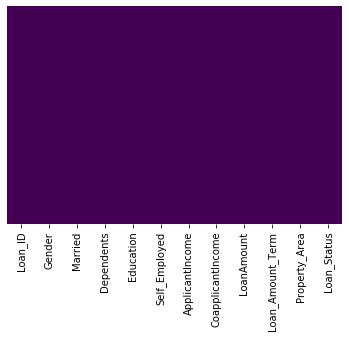

In [10]:
# Fixing the missing value problem

a=df1["LoanAmount"].median()
df1["LoanAmount"].replace({np.nan:a},inplace=True)

a=df1["Loan_Amount_Term"].median()
df1["Loan_Amount_Term"].replace({np.nan:a},inplace=True)

df1['Dependents'] = df1[['Dependents','Married']].apply(impute_dep,axis=1)

df1['Married'] = df1[['Married','Dependents']].apply(impute_mar,axis=1)

df1["Gender"].replace({np.nan:"Male"},inplace=True)#Feminist don't kill me

df1['Self_Employed'] = df1[['ApplicantIncome','CoapplicantIncome',"Gender","Self_Employed"]].apply(impute_selfemp,axis=1)
  
df1=df1.drop(["Credit_History"],axis=1)

sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
#Categoral values to Numerical Values

df1.Married.replace({"Yes":1,"No":0},inplace=True)

df1.Education.replace({"Graduate":1,"Not Graduate":0},inplace=True)

df1.Self_Employed.replace({"Yes":1,"No":0},inplace=True)

df1.Property_Area.value_counts()

df1.Property_Area.replace({"Semiurban":1,"Urban":2,"Rural":3},inplace=True)

df1.Loan_Status.replace({"Y":1,"N":0},inplace=True)

df1=df1.drop(["Loan_ID"],axis=1)

df1.Gender.replace({"Male":1,"Female":0},inplace=True)

In [12]:
target=df1["Loan_Status"]
df1=df1.drop(["Loan_Status"],axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df1,target,test_size=0.33,random_state=42)

In [14]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
#acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
accuracy_score(y_test,y_pred)

0.6403940886699507

In [15]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
#acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
accuracy_score(y_test,y_pred)

0.645320197044335

In [16]:
#accuracy score
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
accuracy_score(y_test,y_pred)


0.6009852216748769

In [17]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
accuracy_score(y_test,y_pred)


0.6403940886699507

In [18]:
#Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
accuracy_score(y_test,y_pred)

0.6600985221674877

In [19]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
accuracy_score(y_test,y_pred)


C:\Users\SaurabhM\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.645320197044335

In [20]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
accuracy_score(y_test,y_pred)

0.6502463054187192

In [21]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy_score(y_test,y_pred)

0.6009852216748769

In [22]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy_score(y_test,y_pred)

0.6108374384236454

In [23]:
#XGBoost Classifier
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 62.07
Time consumed for training: 0.060
Time consumed for prediction: 0.00298 seconds
